<a href="https://colab.research.google.com/github/kimtomato/ML_Study/blob/main/1_3_1_using_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train/255.0

X_test = X_test/255.0

In [ ]:
#basic model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

test_loss = model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4962 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8791
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.8770


In [ ]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()


In [ ]:
train_img = train_img.reshape(60000,28,28,1)
train_img = train_img/255.0

test_img = test_img.reshape(10000, 28, 28, 1)
test_img = test_img/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_img, train_labels, epochs=5)

test_loss = model.evaluate(test_img, test_labels)


Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4401 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2928 - accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2484 - accuracy: 0.9081
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2160 - accuracy: 0.9189
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2564 - accuracy: 0.9049


- Epoch을 20번으로 늘리면 train_acc는 증가하지만  validation_acc는 감소한다. 

- training_images=training_images.reshape(60000, 28, 28, 1) 
첫번째 Conv에는 하나의 tensor가 필요



In [ ]:
#visualizing Conv, Pooling

print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


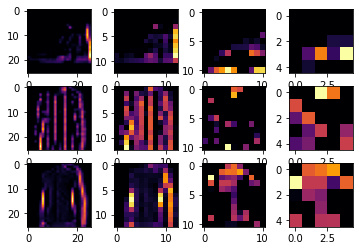

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(3,4)
FIRST_IMG = 0
SECOND_IMG = 7
THIRD_IMG = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models


layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_img[FIRST_IMG].reshape(1, 28, 28, 1))[x]
  ax[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[0,x].grid(False)
  f2 = activation_model.predict(test_img[SECOND_IMG].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[1,x].grid(False)
  f3 = activation_model.predict(test_img[THIRD_IMG].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[2,x].grid(False)

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.7.0
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1482 - accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0091 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0056 - accuracy: 